<a href="https://colab.research.google.com/github/shazam-25/Simplify_ML/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Sample documents
docs = [
    'I love machine learning and deep learning',
    'Aritificial Intelligence and neural networks are fascinating',
    'I enjoy hiking and outdoor activities',
    'Nature and mountains are beautiful',
    'Deep learning can be used for AI applications',
    'Hiking in the mountains is fun and refreshing'
]

# Convert text to bag-of-words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)

In [11]:
# LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=2, random_state=42)

Topic 1: ['learning', 'deep', 'love', 'machine', 'ai']
Topic 2: ['hiking', 'mountains', 'aritificial', 'intelligence', 'networks']


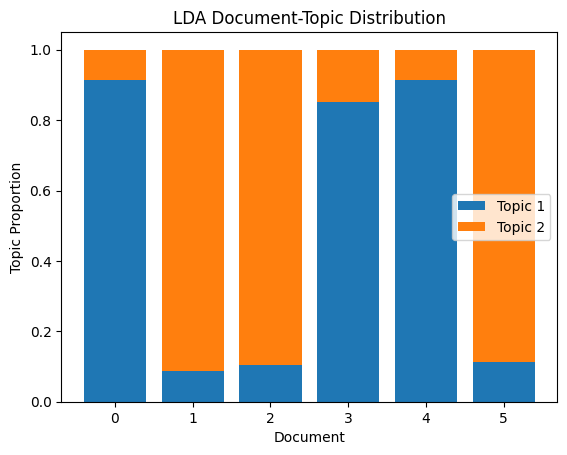

In [12]:
# Display top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
  top_words = [words[j] for j in topic.argsort()[-5:][::-1]]
  print(f'Topic {i+1}: {top_words}')

# Visualize topic distribution for documents
doc_topic_dist = lda.transform(X)
plt.bar(np.arange(len(docs)), doc_topic_dist[:,0], label='Topic 1')
plt.bar(np.arange(len(docs)), doc_topic_dist[:,1], bottom=doc_topic_dist[:,0], label='Topic 2')
plt.xlabel('Document')
plt.ylabel('Topic Proportion')
plt.title('LDA Document-Topic Distribution')
plt.legend()
plt.show()